In [1]:
#Importing required Python packages
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from scipy import sparse
from sklearn.datasets import make_classification, make_blobs, load_boston, fetch_california_housing
from sklearn import metrics
from sklearn.learning_curve import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV
from pprint import pprint
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import urllib
import requests
import seaborn as sns
import pickle
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('ggplot')

/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. 

In [2]:
from get_train_test_for_modeling import *
filename = 'data_X_y_46059_hr.csv'
Xy_df = get_Xy_data(filename)

cols_to_keep = ['YY_x', 'MM_x', 'DD_x', 'hh_x', 'WD_x', 'WSPD_x',
                'GST_x', 'WVHT_x', 'DPD_x', 'APD_x', 'BAR_x', 'ATMP_x',
                'WTMP_x', 'DEWP_x', 'ID_x', 't_arrive','WVHT_y']

allyrs = [1995, 1996, 1997, 1998, 1999, 2000, 2003, 2004, 2006, 2007, 2008]

def make_cv_data_sets(dataframe, cols_to_keep, allyrs):
    X_train_sets = []
    y_train_sets = []
    X_test_sets  = []
    y_test_sets  = []
    for year in allyrs:
        test_yr = [year]
        train_yr =[yr for yr in allyrs if yr != year]
        X_train, X_test, y_train, y_test = get_train_test(Xy_df, cols_to_keep, train_yr, test_yr)
        X_train_sets.append(X_train)
        y_train_sets.append(y_train)
        X_test_sets.append(X_test)
        y_test_sets.append(y_test)
    return X_train_sets, y_train_sets, X_test_sets, y_test_sets

/Users/abdulla/Desktop/PROJECT/src/get_train_test_for_modeling.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/abdulla/anaconda2/envs/py36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/abdulla/anaconda2/envs/py36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-p

In [3]:
X_train_sets, y_train_sets, X_test_sets, y_test_sets = make_cv_data_sets(Xy_df, cols_to_keep, allyrs)

In [ ]:
y_train_sets[0].ravel()

In [ ]:
param_grid = {'learning_rate':[0.1,0.01,0.001],
              'max_depth':[3,4,5],
              'min_samples_leaf':[5],
              'max_features':[0.3]}
gbr = GradientBoostingRegressor(n_estimators=6000)
gbr_cv = GridSearchCV(gbr, param_grid).fit(X_train_sets[0], y_train_sets[0].ravel())
gbr_cv.best_params_

In [16]:
# fitting a gradient booster model
n_estimators = 100000
params = {'n_estimators': n_estimators, 'max_depth': 5, 'min_samples_split': 4,
          'learning_rate': 0.0001, 'loss': 'ls'}
gbr_test = GradientBoostingRegressor(**params)
gbr_test.fit(X_train_sets[0], y_train_sets[0].ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.0001, loss='ls', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=100000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [17]:
lst_train = []
lst_test = []
for i, y_pred in enumerate(gbr_test.staged_predict(X_train_sets[0])):
    lst_train.append(mean_squared_error(y_train_sets[0], y_pred))
    
for i, y_pred in enumerate(gbr_test.staged_predict(X_test_sets[0])):
    lst_test.append(mean_squared_error(y_test_sets[0], y_pred))

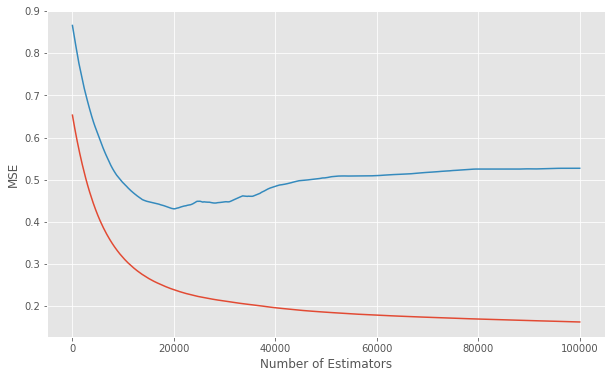

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(lst_train)
ax.plot(lst_test)
ax.set_xlabel('Number of Estimators')
_=ax.set_ylabel('MSE')


In [19]:
y_hat_train = gbr_test.predict(X_train_sets[0])
y_hat_test  = gbr_test.predict(X_test_sets[0])

In [21]:
rmse_train = mean_squared_error(y_train_sets[0], y_hat_train)
rmse_test = mean_squared_error(y_test_sets[0], y_hat_test)
print('rmse train = {}'.format(rmse_train**0.5))
print('rmse test = {}'.format(rmse_test**0.5))

rmse train = 0.40341909131791
rmse test = 0.726071287730978


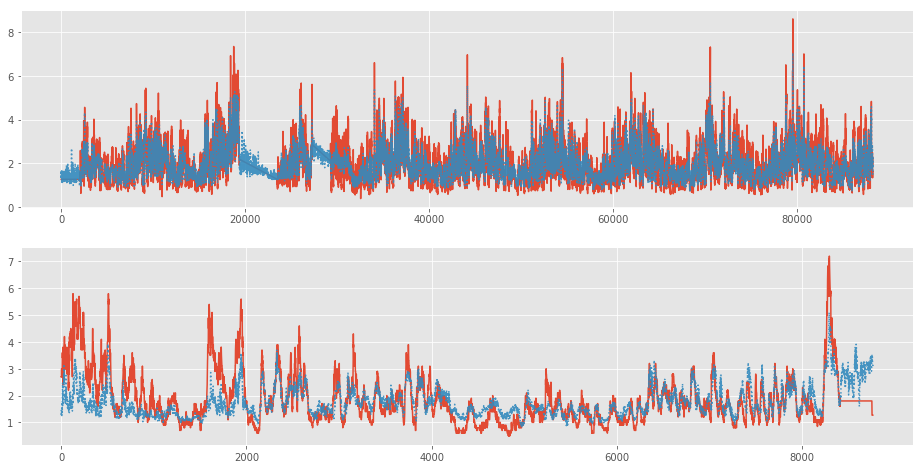

In [22]:
fig, axes = plt.subplots(2, figsize=(16,8))
axes[0].plot(y_train_sets[0])
axes[0].plot(y_hat_train,':', alpha=0.9)
axes[1].plot(y_test_sets[0])
axes[1].plot(y_hat_test,':', alpha=0.9)

## checking with 20,000 estimators

In [35]:
# fitting a gradient booster model
n_estimators = 20000
params = {'n_estimators': n_estimators, 'max_depth': 5, 'min_samples_split': 4,
          'learning_rate': 0.001, 'loss': 'ls'}
gbr_test2 = GradientBoostingRegressor(**params)
gbr_test2.fit(X_train_sets[-1], y_train_sets[-1].ravel())

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=5,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=20000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [36]:
lst_train2 = []
lst_test2 = []
for i, y_pred in enumerate(gbr_test2.staged_predict(X_train_sets[-1])):
    lst_train2.append(mean_squared_error(y_train_sets[-1], y_pred))
    
for i, y_pred in enumerate(gbr_test2.staged_predict(X_test_sets[-1])):
    lst_test2.append(mean_squared_error(y_test_sets[-1], y_pred))

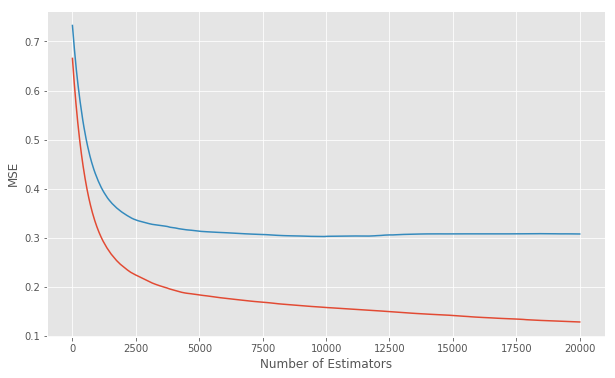

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(lst_train2)
ax.plot(lst_test2)
ax.set_xlabel('Number of Estimators')
_=ax.set_ylabel('MSE')

## Checking with 10,000 estimators

In [ ]:
# fitting a gradient booster model
n_estimators = 10000
params = {'n_estimators': n_estimators, 'max_depth': 5, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr_test3 = GradientBoostingRegressor(**params)
gbr_test3.fit(X_train_sets[-1], y_train_sets[-1].ravel())

In [ ]:
lst_train3 = []
lst_test3 = []
for i, y_pred in enumerate(gbr_test3.staged_predict(X_train_sets[-1])):
    lst_train3.append(mean_squared_error(y_train_sets[-1], y_pred))
    
for i, y_pred in enumerate(gbr_test3.staged_predict(X_test_sets[-1])):
    lst_test3.append(mean_squared_error(y_test_sets[-1], y_pred))

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(lst_train3)
ax.plot(lst_test3)
ax.set_xlabel('Number of Estimators')
_=ax.set_ylabel('MSE')

In [31]:
(20000*0.0001)/100000

2e-05

In [ ]:
# Effect of changing tree depth
N = 500
N_ESTIMATORS = 6000
tree_depths = [3, 5]
error_lst = []
for i in range(len(X_train_sets)):
    models = [GradientBoostingRegressor(learning_rate=0.0001, 
                                        n_estimators=N_ESTIMATORS, 
                                        max_depth=td) 
                for td in tree_depths]
    
    for j,model in enumerate(models):
        print('fitting and predicting for fold {} and tree depth {}'.format(i, tree_depths[j]))
        model.fit(X_train_sets[0], y_train_sets[0])
        y_hat = model.predict(X_test_sets[0])
        mse = metrics.mean_squared_error(y_test_sets[0], y_hat)
        error_lst.append(mse) 
   

In [ ]:
folds = [i for i in range(10)]
dict_cv ={}
for i, item in enumerate(zip([i for i in range(0,55,5)], [j for j in range(5,55,5)])):
    dict_cv[i] = error_lst[item[0]:item[1]]

In [ ]:
df_cv = pd.DataFrame(dict_cv).T
col_names = ['Depth_1', 'Depth_3', 'Depth_5', 'Depth_7', 'Depth_10']
df_cv.columns = col_names

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot([1,3,5,7,10],df_cv.mean()**0.5,':bo', alpha=0.9, 
         markersize=8, markerfacecolor='b', markeredgecolor='r')
ax.set_xlim(0,11)
ax.set_ylim(0.2,0.6)
ax.set_xlabel('Tree Depth', fontsize=14)
_= ax.set_ylabel('Root Mean Squared Error', fontsize=14)
_= plt.title('Grid Search on Tree Depth', fontsize=15)
_=plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig('GridSearch_tree_depth.png')

In [ ]:
colormap = plt.cm.coolwarm
sns.heatmap(df_cv, annot=True, cmap=colormap)